In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.8/921.8 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import torch
import cv2
import numpy as np
import os
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO("yolov10s.pt")

100%|██████████| 15.9M/15.9M [00:00<00:00, 112MB/s] 


In [4]:
home = "/content/drive/MyDrive/Colab Notebooks/personal-tests/tesis/Dataset_mariquitas_23042021_(EC-BO-CL-COL-PE)/research_grade/"

In [6]:

from google.colab.patches import cv2_imshow


image 1/1 /content/drive/MyDrive/Colab Notebooks/personal-tests/tesis/Dataset_mariquitas_23042021_(EC-BO-CL-COL-PE)/research_grade/1526937_1891810.jpg: 448x640 1 teddy bear, 424.9ms
Speed: 5.2ms preprocess, 424.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


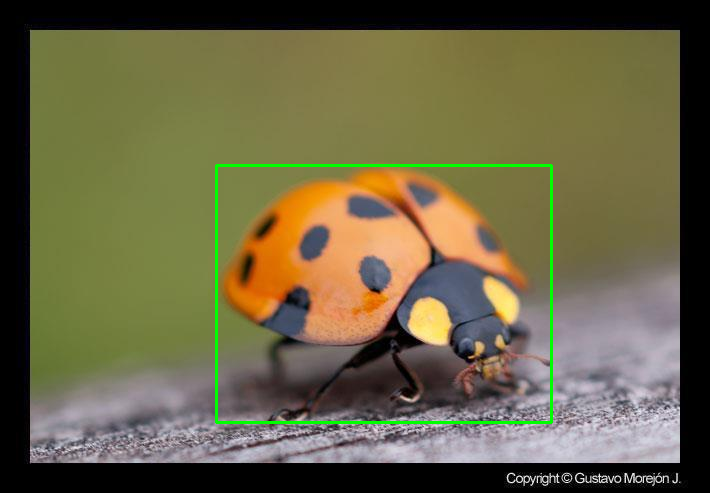

Output saved as output.jpg


In [10]:
image_path = f"{home}1526937_1891810.jpg"
output_path = "output.jpg"

# Load image
img = cv2.imread(image_path)

# Run YOLOv10 inference
results = model.predict(image_path, conf=0.3)

# Draw bounding boxes on the image
for result in results:
    for box in result.boxes.xyxy:  # Get bounding boxes in (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)


cv2_imshow(img)


print(f"Output saved as {output_path}")

In [11]:

results = model.predict(image_path, conf=0.3)


for result in results:
    print(f"Number of detections: {len(result.boxes)}")



image 1/1 /content/drive/MyDrive/Colab Notebooks/personal-tests/tesis/Dataset_mariquitas_23042021_(EC-BO-CL-COL-PE)/research_grade/1526937_1891810.jpg: 448x640 1 teddy bear, 531.9ms
Speed: 3.8ms preprocess, 531.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Number of detections: 1



image 1/1 /content/drive/MyDrive/Colab Notebooks/personal-tests/tesis/Dataset_mariquitas_23042021_(EC-BO-CL-COL-PE)/research_grade/1526937_1891810.jpg: 448x640 1 teddy bear, 546.4ms
Speed: 6.2ms preprocess, 546.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


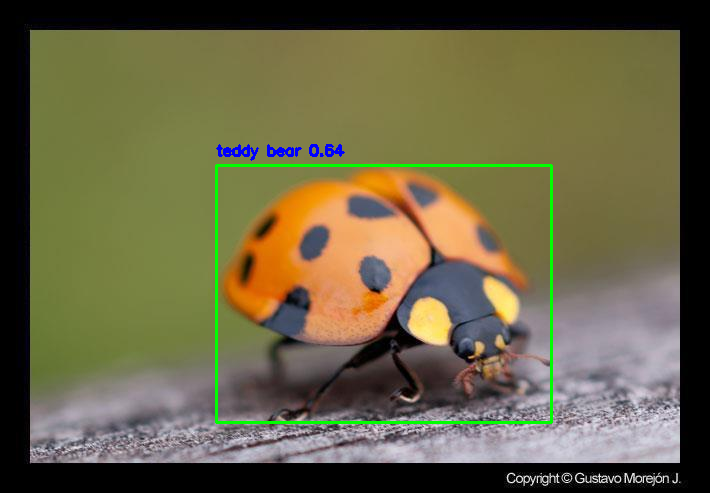

In [12]:
img = cv2.imread(image_path)

# Run YOLOv10 inference
results = model.predict(image_path, conf=0.3)

# Draw bounding boxes and labels on the image
for result in results:
    for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):  # Get box, confidence, and class
        x1, y1, x2, y2 = map(int, box[:4])
        label = model.names[int(cls)]  # Get the label name from class index
        confidence = round(float(conf), 2)  # Confidence score
        label_text = f"{label} {confidence}"

        # Draw bounding box and label
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# ✅ Use cv2_imshow instead of cv2.imshow (Fix for Colab)
cv2_imshow(img)






In [14]:
ladybug = '1527366_1892494.jpg'


image 1/1 /content/drive/MyDrive/Colab Notebooks/personal-tests/tesis/Dataset_mariquitas_23042021_(EC-BO-CL-COL-PE)/research_grade/1526937_1891810.jpg: 448x640 1 teddy bear, 673.9ms
Speed: 9.7ms preprocess, 673.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


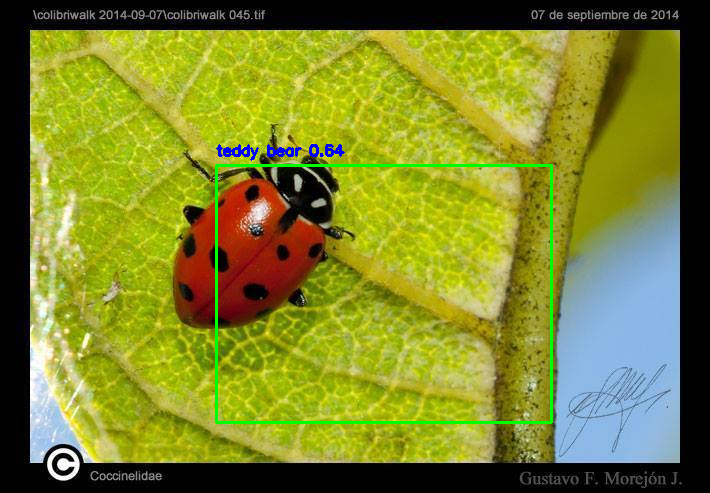

In [15]:
img = cv2.imread(f'{home}{ladybug}')

# Run YOLOv10 inference
results = model.predict(image_path, conf=0.3)

# Draw bounding boxes and labels on the image
for result in results:
    for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):  # Get box, confidence, and class
        x1, y1, x2, y2 = map(int, box[:4])
        label = model.names[int(cls)]  # Get the label name from class index
        confidence = round(float(conf), 2)  # Confidence score
        label_text = f"{label} {confidence}"

        # Draw bounding box and label
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# ✅ Use cv2_imshow instead of cv2.imshow (Fix for Colab)
cv2_imshow(img)